In [98]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()

In [99]:
data = pd.read_csv("C:/Users/Vartotojas/Desktop/Machine learning/Linear regr pex/1.04. Real-life example.csv")

In [100]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [101]:
##Prepocessing data

In [102]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [103]:
data = data.drop(["Model"], axis=1)
data.describe(include= "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [104]:
#write missing values. If you remove less then 5 percent of values you are in safe positon
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [105]:
data_no_mv = data.dropna(axis=0)
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [106]:
data_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\Vartotojas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

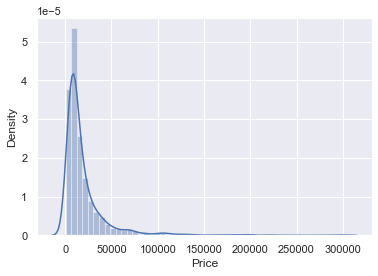

In [107]:
# plot normal distribution
sns.distplot(data_no_mv["Price"])

In [108]:
# Dealing with outliers, remove 1 percent of highest prices from data

In [109]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Vartotojas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

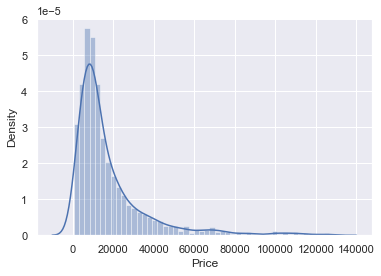

In [110]:
# plot normal distribution
sns.distplot(data_1["Price"])

C:\Users\Vartotojas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

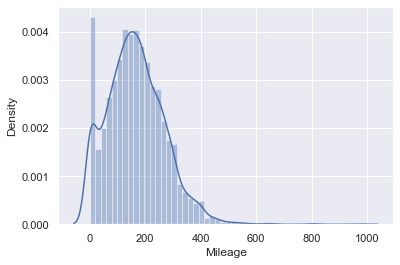

In [111]:
# plot normal distribution mileage
sns.distplot(data_1["Mileage"])

In [112]:
# Dealing with outliers, remove 1 percent of highest values from data
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_no_mv['Mileage']<q]
data_2.describe(include='all')

C:\Users\Vartotojas\AppData\Local\Temp\ipykernel_13908\1087613028.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2 = data_1[data_no_mv['Mileage']<q]


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\Vartotojas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

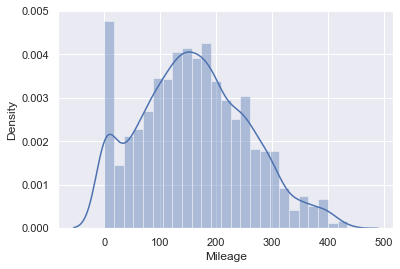

In [113]:
sns.distplot(data_2["Mileage"])

C:\Users\Vartotojas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

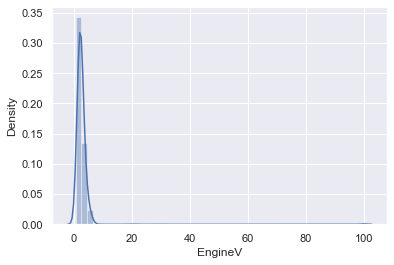

In [114]:
sns.distplot(data_2["EngineV"])

In [115]:
# Dealing with outliers, remove 1 percent of highest prices from data
q = data_2['EngineV'].quantile(0.99)
data_3 = data_2[data_no_mv['EngineV']<q]
data_3.describe(include='all')

C:\Users\Vartotojas\AppData\Local\Temp\ipykernel_13908\1955849729.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_3 = data_2[data_no_mv['EngineV']<q]


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3894,3894.000000,3894,3894.000000,3894.000000,3894,3894,3894.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1483,NaN,NaN,1817,3532,NaN
mean,NaN,17823.805845,NaN,161.598100,2.417681,NaN,NaN,2006.397021
std,NaN,18919.010466,NaN,96.176488,0.896970,NaN,NaN,6.611338
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\Vartotojas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

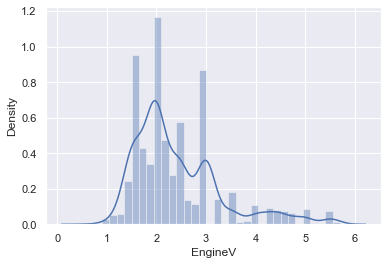

In [116]:
sns.distplot(data_3["EngineV"])

C:\Users\Vartotojas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

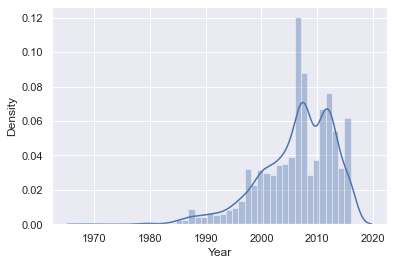

In [117]:
sns.distplot(data_3["Year"])

In [118]:
# Dealing with outliers, remove 1 percent of lowest values from data
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_no_mv['Year']>q]
data_4.describe(include='all')

C:\Users\Vartotojas\AppData\Local\Temp\ipykernel_13908\651165071.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_4 = data_3[data_no_mv['Year']>q]


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3840,3840.000000,3840,3840.000000,3840.000000,3840,3840,3840.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1451,NaN,NaN,1806,3478,NaN
mean,NaN,18028.973987,NaN,160.860156,2.424310,NaN,NaN,2006.702865
std,NaN,18963.887320,NaN,95.742943,0.899824,NaN,NaN,6.117627
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11525.000000,NaN,157.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


C:\Users\Vartotojas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

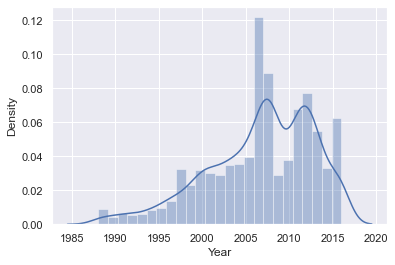

In [119]:
sns.distplot(data_4["Year"])

In [120]:
data_cleaned = data_4
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [121]:

data_cleaned = data_4.reset_index(drop=True)

In [122]:

data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3840,3840.000000,3840,3840.000000,3840.000000,3840,3840,3840.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1451,NaN,NaN,1806,3478,NaN
mean,NaN,18028.973987,NaN,160.860156,2.424310,NaN,NaN,2006.702865
std,NaN,18963.887320,NaN,95.742943,0.899824,NaN,NaN,6.117627
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11525.000000,NaN,157.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


In [123]:
##Checking OLS assumptions


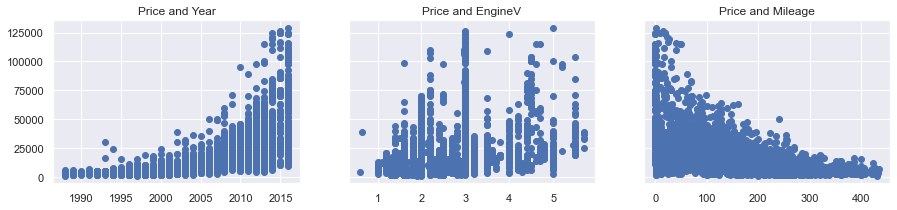

In [124]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

C:\Users\Vartotojas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

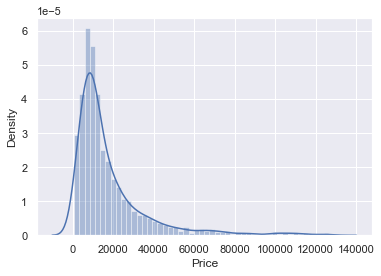

In [125]:
sns.distplot(data_cleaned["Price"])

In [126]:
## relaxing assumption

log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3835,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3836,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3837,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3838,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


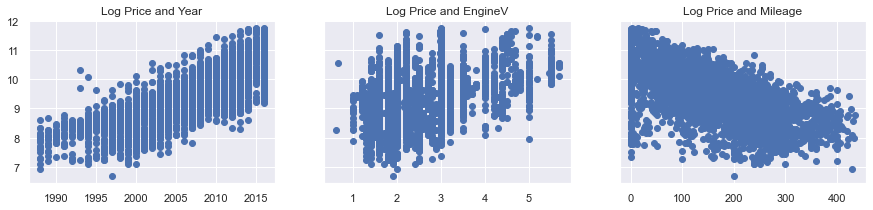

In [127]:
#ploting data with log price and by doing this we create linear regression

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [128]:
data_cleaned = data_cleaned.drop(["Price"], axis = 1)

### Multicollinearity

In [129]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [131]:
# if VIF = 1, there is no multicollinearity
# 1<VIF<5 perfectly OK
# 5<VIF unacceptable
vif

,VIF,features
0,3.798257,Mileage
1,10.823028,Year
2,8.262153,EngineV


In [132]:
data_no_multicol = data_cleaned.drop(["Year"], axis=1)

In [133]:
## Create dummy variables

In [134]:
data_with_dumies = pd.get_dummies(data_no_multicol, drop_first=True)

In [135]:
data_with_dumies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### REarange a bit

In [136]:
data_with_dumies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [137]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [138]:
data_prep = data_with_dumies[cols]
data_prep.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Linear regression model

In [139]:
#Declare inputs and the targets
targets = data_prep['log_price']
inputs = data_prep.drop(['log_price'],axis=1)

In [140]:
#Scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [141]:
inputs_scaled = scaler.transform(inputs)

In [142]:
# train test and split

In [143]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [144]:
#Create regression

In [145]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [146]:
y_hat = reg.predict(x_train)

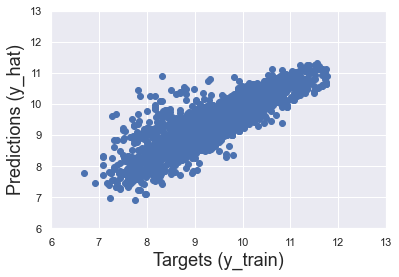

In [147]:
#The closer our scatter plot to this line the better the model
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\Vartotojas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

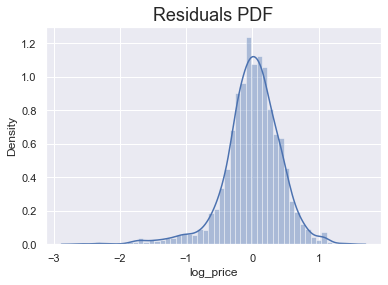

In [148]:
# residuals PDF

sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [149]:
#Model explain 75% of variability
reg.score(x_train,y_train)

0.7530909994619517

In [150]:
# Finding the weights and bias

In [151]:
reg.intercept_

9.40624015974228

In [153]:
reg.coef_

array([-0.46208995,  0.20783939,  0.02796076,  0.02181996, -0.13396688,
       -0.17590569, -0.05228283, -0.0833789 , -0.15189951, -0.10228949,
       -0.18570147, -0.12102094, -0.15973313, -0.12825029, -0.03177898,
       -0.15309642,  0.31756163])

In [154]:
# Positive weight shows that as a feature increases in value (log price and "price" respectively)
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.462090
1,EngineV,0.207839
2,Brand_BMW,0.027961
3,Brand_Mercedes-Benz,0.021820
4,Brand_Mitsubishi,-0.133967
5,Brand_Renault,-0.175906
6,Brand_Toyota,-0.052283
7,Brand_Volkswagen,-0.083379
8,Body_hatch,-0.151900
9,Body_other,-0.102289


In [155]:
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Testing model performance


In [156]:
y_hat_test = reg.predict(x_test)

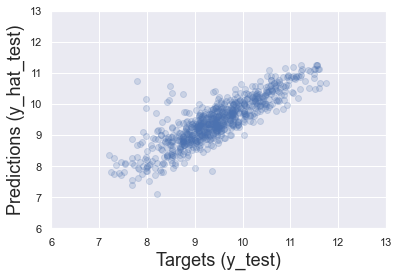

In [157]:
# according to 45deg line model good predict at higher prices but not so good in lower prices
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [158]:
# data model performance (returns the exponential of x the Euler number e to the power of x)
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,15535.946008
1,2796.672171
2,11365.210116
3,18659.097878
4,11913.497999


In [159]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,15535.946008,NaN
1,2796.672171,7900.0
2,11365.210116,NaN
3,18659.097878,NaN
4,11913.497999,NaN
...,...,...
763,7542.214217,NaN
764,16819.771391,NaN
765,3249.970728,22900.0
766,3211.646544,NaN


In [161]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    9.082507
1    8.556414
2    9.803667
3    9.661416
4    9.169518
Name: log_price, dtype: float64

In [162]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,15535.946008,8800.0
1,2796.672171,5200.0
2,11365.210116,18100.0
3,18659.097878,15700.0
4,11913.497999,9600.0
...,...,...
763,7542.214217,4950.0
764,16819.771391,16000.0
765,3249.970728,5400.0
766,3211.646544,4100.0


In [163]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [164]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,15535.946008,8800.0,-6735.946008,76.544841
1,2796.672171,5200.0,2403.327829,46.217843
2,11365.210116,18100.0,6734.789884,37.208784
3,18659.097878,15700.0,-2959.097878,18.847757
4,11913.497999,9600.0,-2313.497999,24.098937
...,...,...,...,...
763,7542.214217,4950.0,-2592.214217,52.367964
764,16819.771391,16000.0,-819.771391,5.123571
765,3249.970728,5400.0,2150.029272,39.815357
766,3211.646544,4100.0,888.353456,21.667157


In [165]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,768.000000,768.000000,768.000000,768.000000
mean,16447.874138,18297.171302,1849.297164,38.473729
std,13384.954198,18743.891850,10038.263969,87.490563
min,1216.582743,1350.000000,-42815.485475,0.153037
25%,7653.198480,7300.000000,-2060.821266,11.685370
50%,12075.240486,12350.000000,424.778099,23.458972
75%,20581.882742,20814.787500,3597.752988,41.438934
max,77042.055420,126000.000000,83122.691419,1783.978561


In [166]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
650,3004.59,3000.00,-4.59,0.15
607,39566.02,39500.00,-66.02,0.17
437,29555.49,29500.00,-55.49,0.19
346,45123.59,44999.00,-124.59,0.28
198,11548.10,11500.00,-48.10,0.42
635,17419.53,17500.00,80.47,0.46
407,46736.93,47000.00,263.07,0.56
541,42797.94,42500.00,-297.94,0.70
694,42591.85,42900.00,308.15,0.72
116,20331.25,20500.00,168.75,0.82
